######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#35c359">Recurrent Neural Network (RNN)
<font color=darkblue>
    
######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#d40eea">Import Libraries
<font color=darkblue>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from scipy.spatial.distance import cdist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers
import keras

import warnings
warnings.filterwarnings('ignore')

#####  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0e36ea">Load the dataset
<font color=darkblue>

In [2]:
### load in and normalize the dataset
dataset = np.loadtxt('/home/jayanthikishore/Downloads/ML_classwork/Week5_srrt/normalized_apple_prices.csv')
# dataset = pd.read_csv('/Downloads/ML_classwork/Week5_srrt/normalized_apple_prices.csv')

#####  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea0e41">How it bahaves the normalized datasets
<font color=darkblue>

Text(0.5, 1.0, 'Normalized Apple prices')

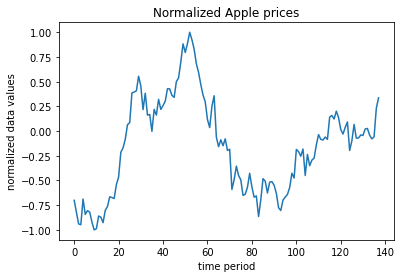

In [3]:
plt.plot(dataset)
plt.xlabel('time period')
plt.ylabel('normalized data values')
plt.title('Normalized Apple prices')

#####  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#1d0eea">Transform window size to time series pairs
<font color=darkblue>

In [4]:
def transform_win_series(series,win_size):
    # containers for input/output pairs
    X = []
    y = []
    
    # For the series, loop through the series minus the window size.
    for i in range(win_size, len(series)):
        X.append(series[i - win_size:i])  # insert our inputs into the input array
        y.append(series[i]) # insert our output pairs into the output array
    
        
    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    
    return X,y

odd_nums = np.array([1,3,5,7,9,11,13,15,17])
wind_size = 2
X,y = transform_win_series(odd_nums,wind_size)
print ('the shape of X is ' + str(np.shape(X)))
print ('the shape of y is ' + str(np.shape(y)))
print('X type:',type(X))
print('y tupe:',type(y))

the shape of X is (7, 2)
the shape of y is (7, 1)
X type: <class 'numpy.ndarray'>
y tupe: <class 'numpy.ndarray'>


#####  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#1d0eea">Splitting the data into train and test
<font color=darkblue>

In [5]:
wind_size = len(odd_nums)
X,y = transform_win_series(series = dataset,win_size = wind_size)
print(X.shape, y.shape)

(129, 9) (129, 1)


In [6]:
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], wind_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], wind_size, 1)))

#####  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#1d0eea">Build RNN regression model
<font color=darkblue>

- layer 1 uses an LSTM module with 5 hidden units (note here the input_shape = (window_size,1))
- layer 2 uses a fully connected module with one unit
- the 'mean_squared_error' loss should be used (remember: we are performing regression here)

In [7]:
np.random.seed(0)
step_size = 1

##### build an RNN to perform regression on our time series input/output data
model = Sequential()

###### Layer1 add a LSTM layer with 5 hidden units and shape of (window_size, 1)
model.add(LSTM(5, input_shape=(wind_size, step_size))) 

###### Layer2 Dense layer with 1 output node and linear activation function
model.add(Dense(step_size, input_dim=wind_size, activation='linear'))

##### Optimizer
###### https://keras.io/getting-started/sequential-model-guide/
opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

###### compile the model
model.compile(loss='mean_squared_error', optimizer=opt)

#####  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#1d0eea">Run the model
<font color=darkblue>

In [8]:
# model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=0)
model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

#####  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#1d0eea">Model performance
<font color=darkblue>

In [9]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [10]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.014836924150586128
testing error = 0.016076071187853813


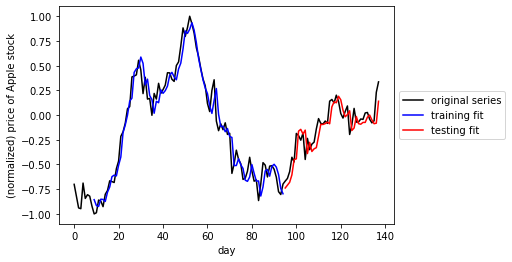

In [11]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(dataset,color = 'k')

# plot training set prediction
splt_pnts = train_test_split + wind_size 
plt.plot(np.arange(wind_size,splt_pnts,1),train_predict,color = 'b')

# plot testing set prediction

plt.plot(np.arange(splt_pnts,splt_pnts + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()